<a href="https://colab.research.google.com/github/AWH-GlobalPotential-X/AWH-Geo/blob/main/notebooks/Subnational_Estimated_Water_Level_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subnational Estimated Water Level errors

In [ ]:
import matplotlib.pyplot as plt
import mizani
import numpy as np
import pandas as pd
import plotnine as gg
from matplotlib import colors
from scipy import interpolate

from IPython.display import display

In [ ]:
import io
from colabtools import drive

In [ ]:
content = drive.LoadFile('jmpGeofabric_SNdata.csv')
df_all_sub_nationals = pd.read_csv(io.BytesIO(content))
df_all_sub_nationals.head()

Beginning OAuth2 authorization process ...
Authentication successful.


,ISO3,COUNTRY,JMP_REGNM,ALB_NE,ALB_SE,JMP_ALBSNE,SM_NE,SM_SE
0,CAF,Central African Republic,baminigui bangoran,0,64.441312,64.441312,0,0.0
1,CAF,Central African Republic,bangui,0,78.325088,78.325088,0,0.0
2,CAF,Central African Republic,basse kotto,0,20.311748,20.311748,0,0.0
3,CAF,Central African Republic,haut mbomou,0,44.121118,44.121118,0,0.0
4,CAF,Central African Republic,haute-kotto,0,53.731287,53.731287,0,0.0


In [ ]:
content = drive.LoadFile('SMDW_subnational.csv')
df_sub_nationals = pd.read_csv(io.BytesIO(content))
df_sub_nationals.head()

,country,region_string,safelymanaged
0,Bangladesh,Barishal,0.35
1,Bangladesh,Chattogram,0.41
2,Bangladesh,Dhaka,0.41
3,Bangladesh,Khulna,0.46
4,Bangladesh,Mymenshing,0.45


In [ ]:
df_agg_ref = df_all_sub_nationals.groupby('COUNTRY').SM_SE.mean().reset_index(name='ref Safely Managed %')
df_agg_estimated = (df_sub_nationals.groupby('country').safelymanaged.mean() * 100).reset_index(name='estimate Safely Managed %')
df_agg = df_agg_ref.merge(df_agg_estimated, left_on='COUNTRY', right_on='country')

df_tidy = df_agg.rename(columns={'estimate Safely Managed %': 'estimate', 'ref Safely Managed %': 'ref'})

err = (df_tidy['estimate'] - df_tidy['ref'])
print(f'Error: mean={err.mean()} stddev={err.std()}')

Error: mean=-17.733127371205153 stddev=8.368459053956725


In [ ]:
import statsmodels.formula.api as smf

model = smf.ols(formula='estimate ~ ref', data=df_tidy)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               estimate   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     85.85
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           4.33e-07
Time:                        14:16:39   Log-Likelihood:                -48.936
No. Observations:                  15   AIC:                             101.9
Df Residuals:                      13   BIC:                             103.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.7725      3.879     -2.004      0.0

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_deepmind_py3_jacksonlord.kernel.jacksonlord.324183883028.14b334fb3717c109/mount/server/dm_notebook3.par/google3/third_party/py/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


In [ ]:
result.params

Intercept   -7.772493
ref          0.762989
dtype: float64

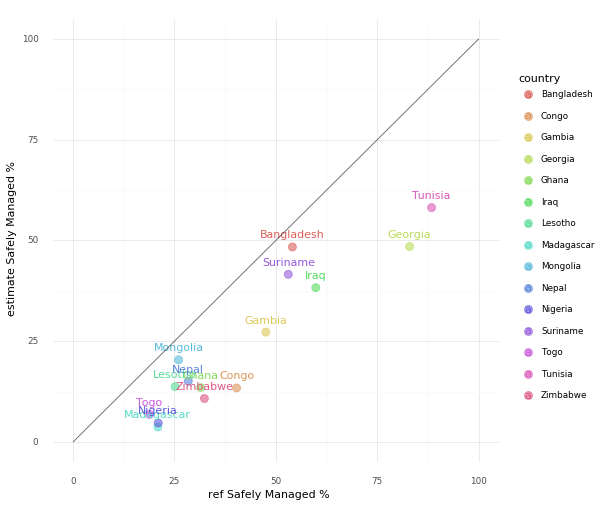

<ggplot: (-9223363265238124891)>


In [ ]:
p = (
    gg.ggplot(df_agg, gg.aes(x='ref Safely Managed %', y='estimate Safely Managed %'))
    + gg.geom_point(gg.aes(color='country'), size=4, alpha=0.6)
    + gg.geom_text(gg.aes(label='country', color='country'), nudge_y=3)
    + gg.geom_line(pd.DataFrame({'x': [0, 100], 'y': [0, 100]}), gg.aes(x='x', y='y'), color='black', alpha=0.6)
    + gg.lims(x=(0, 100), y=(0, 100))
    + gg.theme_minimal()
    + gg.theme(figure_size=(8, 8))
)

print(p)